In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!nvidia-smi

Sun Jan  8 05:46:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    32W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Preparations

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw4/ex_3'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/AppliedGPU_hw4/ex_3
lab3_ex2	     lab4_ex3_pinned	 report2.qdrep	 report4.qdrep
lab3_ex2.cu	     lab4_ex3_pinned.cu  report2.sqlite  report4.sqlite
lab4_ex3_managed     report1.qdrep	 report3.qdrep	 report5.qdrep
lab4_ex3_managed.cu  report1.sqlite	 report3.sqlite  report6.qdrep


#Compiling

In [5]:
#!nvcc -arch=sm_75 ./lab3_ex2.cu -o lab3_ex2
#!nvcc -arch=sm_75 ./lab4_ex3_pinned.cu -o lab4_ex3_pinned
!nvcc -arch=sm_75 ./lab4_ex3_managed.cu -o lab4_ex3_managed

#Executing & Profiling

In [ ]:
#!nvprof ./lab3_ex2 511 1023 4094
#!nvprof ./lab4_ex3_pinned 511 1023 4094
!nvprof ./lab4_ex3_managed 511 1023 4094

Dimensions of input matrix A (511 x 1023), B (1023 x 4094), and output matrix C (511 x 4094)
==29118== NVPROF is profiling process 29118, command: ./lab4_ex3_managed 511 1023 4094
CPU & GPU results are equal.
==29118== Profiling application: ./lab4_ex3_managed 511 1023 4094
==29118== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  22.038ms         1  22.038ms  22.038ms  22.038ms  gemm(float*, float*, float*, int, int, int, int)
      API calls:   92.55%  309.08ms         4  77.269ms  13.224us  309.01ms  cudaMallocManaged
                    6.60%  22.046ms         1  22.046ms  22.046ms  22.046ms  cudaDeviceSynchronize
                    0.65%  2.1752ms         4  543.81us  232.34us  907.84us  cudaFree
                    0.11%  371.97us         1  371.97us  371.97us  371.97us  cuDeviceTotalMem
                    0.05%  160.04us       101  1.5840us     132ns  76.368us  cuDeviceGetAttribute
                 

In [ ]:
#!nvprof ./lab3_ex2 2048 2048 2048
#!nvprof ./lab4_ex3_pinned 2048 2048 2048
!nvprof ./lab4_ex3_managed 2048 2048 2048

Dimensions of input matrix A (2048 x 2048), B (2048 x 2048), and output matrix C (2048 x 2048)
==25209== NVPROF is profiling process 25209, command: ./lab4_ex3_managed 2048 2048 2048
CPU & GPU results are equal.
==25209== Profiling application: ./lab4_ex3_managed 2048 2048 2048
==25209== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  85.920ms         1  85.920ms  85.920ms  85.920ms  gemm(float*, float*, float*, int, int, int, int)
      API calls:   77.39%  310.24ms         4  77.559ms  7.2990us  310.18ms  cudaMallocManaged
                   21.42%  85.871ms         1  85.871ms  85.871ms  85.871ms  cudaDeviceSynchronize
                    1.01%  4.0462ms         4  1.0116ms  728.89us  1.1781ms  cudaFree
                    0.09%  376.23us         1  376.23us  376.23us  376.23us  cuDeviceTotalMem
                    0.04%  172.32us         1  172.32us  172.32us  172.32us  cudaLaunchKernel
                 

In [ ]:
#!nvprof ./lab3_ex2 3000 3000 3000
#!nvprof ./lab4_ex3_pinned 3000 3000 3000
!nvprof ./lab4_ex3_managed 3000 3000 3000

Dimensions of input matrix A (3000 x 3000), B (3000 x 3000), and output matrix C (3000 x 3000)
==25728== NVPROF is profiling process 25728, command: ./lab4_ex3_managed 3000 3000 3000
CPU & GPU results are equal.
==25728== Profiling application: ./lab4_ex3_managed 3000 3000 3000
==25728== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:  100.00%  208.06ms         1  208.06ms  208.06ms  208.06ms  gemm(float*, float*, float*, int, int, int, int)
      API calls:   59.30%  315.76ms         4  78.940ms  14.408us  315.69ms  cudaMallocManaged
                   39.06%  208.00ms         1  208.00ms  208.00ms  208.00ms  cudaDeviceSynchronize
                    1.49%  7.9348ms         4  1.9837ms  1.4553ms  2.4286ms  cudaFree
                    0.08%  419.60us         1  419.60us  419.60us  419.60us  cuDeviceTotalMem
                    0.03%  175.21us         1  175.21us  175.21us  175.21us  cudaLaunchKernel
                 

In [8]:
#!nvprof ./lab3_ex2 3000 4096 3000
#!nvprof ./lab4_ex3_pinned 3000 4096 3000
!nvprof ./lab4_ex3_managed 3000 33 3000
#!nsys profile ./lab4_ex3_managed 3000 4096 3000 --unified-memory-profiling off

Dimensions of input matrix A (3000 x 3500), B (3500 x 3000), and output matrix C (3000 x 3000)
==772== NVPROF is profiling process 772, command: ./lab4_ex3_managed 3000 3500 3000
==772== Profiling application: ./lab4_ex3_managed 3000 3500 3000
==772== Profiling result:
No kernels were profiled.
No API activities were profiled.
==772== Warning: Some profiling data are not recorded.
======== Error: Application received signal 139


# Plots & Analysis original code

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

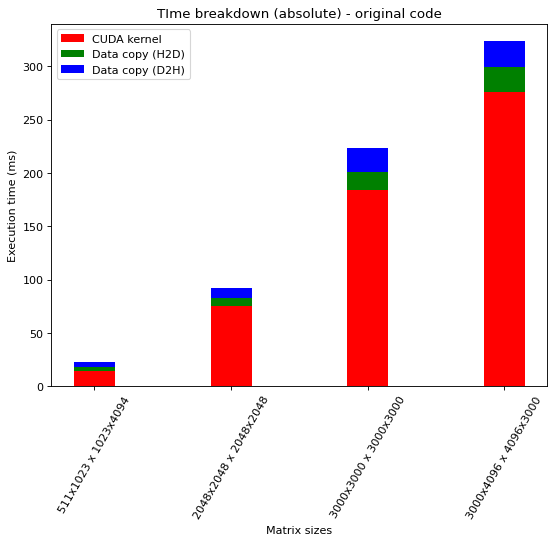

In [ ]:
# absolute time
matrix_sizes = ['511x1023 x 1023x4094', '2048x2048 x 2048x2048', '3000x3000 x 3000x3000', '3000x4096 x 4096x3000']

figure(figsize=(8, 6), dpi=80)

time_cuda_kernel_abs = np.array([14.618, 75.130, 184.10, 276.13])
time_datacopy_d2h_abs = np.array([4.1716, 9.4251, 22.102, 24.019])
time_datacopy_h2d_abs = np.array([3.7465, 7.2788, 16.857, 23.453])


plt.bar(matrix_sizes, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_h2d_abs, bottom=time_cuda_kernel_abs,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_d2h_abs, bottom=time_datacopy_h2d_abs+time_cuda_kernel_abs,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (absolute) - original code')
plt.xlabel('Matrix sizes')
plt.xticks(rotation=60)
plt.ylabel('Execution time (ms)')
plt.legend()

#Plots & Analysis Pinned Memory

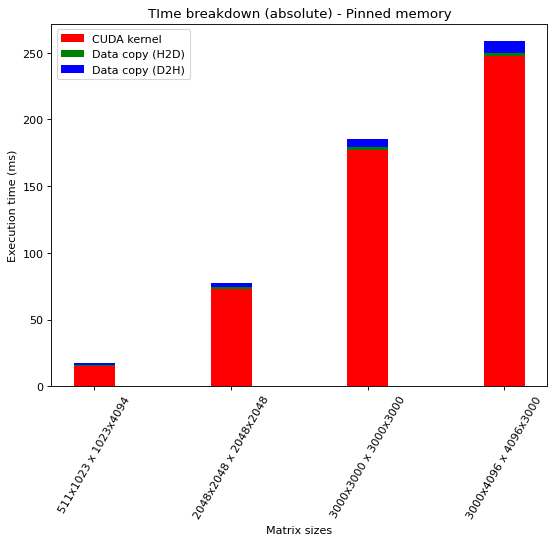

In [ ]:
# absolute time
matrix_sizes = ['511x1023 x 1023x4094', '2048x2048 x 2048x2048', '3000x3000 x 3000x3000', '3000x4096 x 4096x3000']

figure(figsize=(8, 6), dpi=80)

time_cuda_kernel_abs = np.array([14.968, 73.089, 176.74, 247.34])
time_datacopy_d2h_abs = np.array([1.6855, 2.9818, 6.1002, 8.6971])
time_datacopy_h2d_abs = np.array([666.16*10**-3, 1.3358, 2.7359, 2.7425])


plt.bar(matrix_sizes, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_h2d_abs, bottom=time_cuda_kernel_abs,
       label='Data copy (H2D)', color = 'green', width = 0.3)
plt.bar(matrix_sizes, time_datacopy_d2h_abs, bottom=time_datacopy_h2d_abs+time_cuda_kernel_abs,
       label='Data copy (D2H)', color = 'blue', width = 0.3)

plt.title('TIme breakdown (absolute) - Pinned memory')
plt.xlabel('Matrix sizes')
plt.xticks(rotation=60)
plt.ylabel('Execution time (ms)')
plt.legend()

# Plots & Analysis Managed Memory

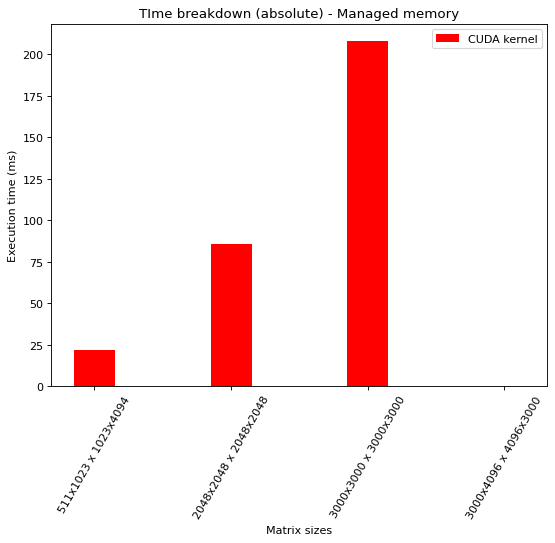

In [11]:
# absolute time
matrix_sizes = ['511x1023 x 1023x4094', '2048x2048 x 2048x2048', '3000x3000 x 3000x3000', '3000x4096 x 4096x3000']

figure(figsize=(8, 6), dpi=80)

time_cuda_kernel_abs = np.array([22.004, 85.920, 208.06, 0])


plt.bar(matrix_sizes, time_cuda_kernel_abs, label='CUDA kernel', color = 'red', width = 0.3)

plt.title('TIme breakdown (absolute) - Managed memory')
plt.xlabel('Matrix sizes')
plt.xticks(rotation=60)
plt.ylabel('Execution time (ms)')
plt.legend()